# Lit poreux catalytique

Une réaction gazeuse est effectuée sur un lit poreux catalytique de 0,5 m<sup>3</sup> avec une porosité (entre les grains) de 40%. Les grains du lit poreux ont un rayon de 15 mm et le réactif gazeux, consommé par la réaction d’ordre 1, a un coefficient de diffusion de 2.10<sup>-6</sup> m<sup>2</sup>.s<sup>-1</sup>. Une expérience réalisée sur le lit permet de mesurer une disparition de réactif de 8 mole.s<sup>-1</sup> lorsque la concentration en phase gazeuse est de 200 moles/m<sup>3</sup>.

**a)	En considérant un équilibre entre réaction et diffusion interne déterminer le phénomène limitant du procédé. On déterminera pour cela le module de Thiele $\phi_s$ en s’aidant du calcul du flux de matière à la surface d’un grain.**


>Il n'est pas possible de calculer le module de Thiele $\varphi_s$ a priori à partir des données sur la cintétiqe de réaction et sur le transfert de matière. Nous n'avons pas ici de données sur la cinétique. Nous avons par contre une donnée sur le fonctionnement du procédé : le procédé consomme 8 moles par seconde de réactif. 
>
>En réalisant un bilan différentiel sur un élément de volume dans un grain de catalyseur, il est possible de démontrer que la consommation d'un réactif en régime permanent par un grain de catalyseur s'écrit :
>$$ \left.n \right|_{r=R} =-4\pi R D c_i (1-\frac{\varphi_s}{tanh(\varphi_s)})$$
> où $\left.n \right|_{r=R}$ est le flux de réactif entrant dans le grain mais aussi la quantité de réactif consommée par le grain et $c_i$ est la concentration en réactif à l'interface du grain catalytique. En première approximation, nous considèrerons que cette concentration $c_i$ est proche de la concentration en réactif dans la solution (nous négligerons la résistance au transfert induite par diffusion du réactif dans la couche limite autour du grain). Ce problème est traité dans une annale.
>
> Le code suivant permet de calculer :
>1. le nombre de moles consommé par un grain de catalyseur à partir de la consommation totale dans l'ensemble du lit catalytique qui comporte n_grain.
>2. Le module de Thiele correspondant à ce fonctionnement à partir de l'expression donnée ci-dessus (il est nécessaire de résoudre numériquement l'équation)





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
#DATA
#Solution
c0=200. #mol/L
D=2.e-6 #m2/s
#lit poreux
V_lit=0.5 #m3
eps_lit=0.4 #porosité
NS_lit=8 #mol/s
#Catalyseur 
R_grain=15.e-3 #m
ci=c0

#CALCUL du nombre de grains
#Volume occupé par les grains
V_grains=(1-eps_lit)*V_lit
#Volume d'un grain
V_grain=4*np.pi*(R_grain**3)/3
n_grain=V_grains/V_grain
print('Il y a ', round(n_grain),'grains de catalyseur dans le lit poreux')

#CALCUL de la quantité consommée par un grain
NS_grain=NS_lit/n_grain
print('La quantité consommée par un grain est de ', "%.2e"%NS_grain, ' mol/s')

#Fonction à résoudre pour déterminer phis
def f(phis):
            return NS_grain+4*np.pi*R_grain*D*ci*(1-phis/np.tanh(phis))

phis=newton(f,x0=1.)
print ('Le module de Thiele pour ce procédé est de ', "%.2e"%phis)  
    
if phis<0.3:
    lim='réation'
elif phis>3:
    lim='diffusion'
else :
    lim='diffusion interne et réaction'
print ('Le(s) phénomène(s) de', lim, 'est(sont) limitant(s) pour le fonctionnement du procédé')
eff=3*(phis/np.tanh(phis)-1)/(phis**2)
print ('L efficacité du procédé est de', round(eff*100), '%')

#Tracé du profil de concentration dans le grain
r=np.linspace(R_grain/1000,R_grain,100)
c=ci*(R_grain*np.sinh(phis*r/R_grain))/(r*np.sinh(phis))
plt.plot(r,c) 
plt.title('Evolution de la concentration en réactif dans le grain de catalyseur')
plt.xlabel('Distance au centre du grain, r, en metre')
plt.ylabel('Concentration en réactif, c, en mol/m3')
plt.show()

#Calcul de la concentration au centre du grain
c_centre=ci*phis/np.sinh(phis)


Il y a  21221 grains de catalyseur dans le lit poreux
La quantité consommée par un grain est de  3.77e-04  mol/s
Le module de Thiele pour ce procédé est de  6.00e+00
Le(s) phénomène(s) de diffusion est(sont) limitant(s) pour le fonctionnement du procédé
L efficacité du procédé est de 42.0 %


<Figure size 640x480 with 1 Axes>

**b)	Déteminer la taille des grains qui permettrait d’avoir un module de Thiele de 1. Recalculer la vitesse de disparition du réactif dans le lit poreux et conclure.**

>La réduction de la taille des grains permettrait de réduire l’étape de diffusion interne. Ainsi à un grain 6 fois plus petit correspond un module de Thiele de 1 signifiant une augmentation d'efficacité. Le flux de matière par grain est alors de 3,933 10<sup>-6</sup> moles.s<sup>-1</sup>. Le nombre de grains dans le lit poreux est supérieur et de 4,58.10<sup>+6</sup>. Le flux de matière dans le lit poreux est alors de 18 moles.s<sup>-1</sup>. La réduction de la taille de grain permet donc de multiplier par 2,25 la réaction catalytique. Le facteur d’efficacité passe de 0,42 à 0,94. La raison est que la concentration moyenne dans le grain est beaucoup plus importante dans les petits grains : dans les gros grains la diffusion est limitante et le centre du grain n'est pas alimenté en réactif. 
>
>Le code ci dessous permet de résoudre la question avec la séquence suivante : 
>1. calcul de $\varphi_s$ , 
>2. calcul de la quantité de matière consommée par un grain 
>3. calcul de quantité totale consommée dans le lit poreux catalytique.


Le module de Thiele pour ce procédé est de  1.00e+00 pour une taille de grain de  2.5 mm de rayon
Il y a  4583662 grains de catalyseur dans le lit poreux
La quantité consommée par un grain est de  3.93e-06  mol/s
Le(s) phénomène(s) de diffusion interne et réaction est(sont) limitant(s) pour le fonctionnement du procédé
L efficacité du procédé est de 42.0 %

------------ CONCLUSIONS SUR L EFFET DE LA TAILLE DES GRAINS --------------
Le réacteur consommera au final 1.80e+01 mol/s pour les grains de  2.5 mm de rayon contre  8.00e+00 mol/s pour les grains de  15.0 mm de rayon
car la concentration au centre du grain est de 1.70e+02 mol/m3 pour les grains de  2.5 mm de rayon contre  5.95e+00 mol/m3 pour les grains de  15.0 mm de rayon
Le gain de consommation entre les deux cas est de 2.25 et est aussi égal au rapport d efficacite 2.25  car on raisonne à surface de catalyseur identique


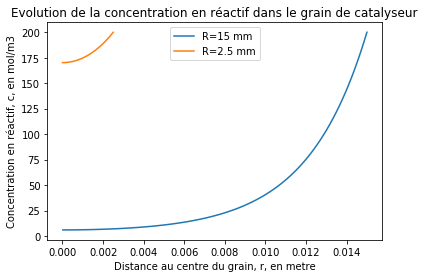

In [38]:
#Nouvelle taille de grains permettant d'avoir phis=1
R_grain2=15.e-3/6
phis=1.
print ('Le module de Thiele pour ce procédé est de ', "%.2e"%phis, 'pour une taille de grain de ', R_grain2*1000, 'mm de rayon')  

#Volume d'un grain
V_grain2=4*np.pi*(R_grain2**3)/3
#Nombre de grains
n_grain2=V_grains/V_grain2
print('Il y a ', round(n_grain2),'grains de catalyseur dans le lit poreux')

#CALCUL de la quantité consommée par un grain
NS_grain2=4*np.pi*R_grain2*D*ci*(phis/np.tanh(phis)-1)
print('La quantité consommée par un grain est de ', "%.2e"%NS_grain2, ' mol/s')

if phis<0.3:
    lim='réation'
elif phis>3:
    lim='diffusion'
else :
    lim='diffusion interne et réaction'
print ('Le(s) phénomène(s) de', lim, 'est(sont) limitant(s) pour le fonctionnement du procédé')

eff2=3*(phis/np.tanh(phis)-1)/(phis**2)
print ('L efficacité du procédé est de', round(eff*100), '%')

#Calcul de la quantite consommee dans le lit poreux
NS_lit2=NS_grain2*n_grain2

#Calcul de la concentration au centre du grain
c_centre2=ci*phis/np.sinh(phis)

print ('')
print ('------------ CONCLUSIONS SUR L EFFET DE LA TAILLE DES GRAINS --------------')
print ('Le réacteur consommera au final', "%.2e"%NS_lit2, 'mol/s pour les grains de ', R_grain2*1000, 'mm de rayon contre ', "%.2e"%NS_lit, 'mol/s pour les grains de ', R_grain*1000, 'mm de rayon' )
print ('car la concentration au centre du grain est de', "%.2e"%c_centre2, 'mol/m3 pour les grains de ', R_grain2*1000, 'mm de rayon contre ', "%.2e"%c_centre, 'mol/m3 pour les grains de ', R_grain*1000, 'mm de rayon' )
print ('Le gain de consommation entre les deux cas est de', round(NS_lit2/NS_lit,2), 'et est aussi égal au rapport d efficacite', round(eff2/eff,2), ' car on raisonne à surface de catalyseur identique')


#Tracé du profil de concentration dans le grain
r2=np.linspace(R_grain2/1000,R_grain2,100)
c2=ci*(R_grain*np.sinh(phis*r/R_grain))/(r*np.sinh(phis))
plt.plot(r,c, label='R=15 mm') 
plt.plot(r2,c2, label='R=2.5 mm') 
plt.legend(loc='upper center')
plt.title('Evolution de la concentration en réactif dans le grain de catalyseur')
plt.xlabel('Distance au centre du grain, r, en metre')
plt.ylabel('Concentration en réactif, c, en mol/m3')
plt.show()



**Pour aller plus loin : couplage avec le transfert dans une couche limite autour du grain**

Une approximation réalisée dans l'exercice est de considérer que la concentration à l'interface est celle du milieu gazeux qui circule autour du grain. Or, il y a autour des grains une couche limite de diffusion engendrée par l'écoulement autour du grain. Cette couche limite provoque une nouvelle limitation au transfert de réactif depuis la solution vers le catalyseur. De façon générale, le transfert dans la couche limite peut s'écrire :
$$N=k(c_0-c_i)$$
où $k=\frac{D}{\delta}$ est le coefficient de transfert dans la couche limite, $\delta$, et $c_0$ est la concentration dans la solution (nous reprendrons ici la valeur de 200 mol/m3). La concentration $c_i$ est maintenant inconnue.

>Pour déterminer cette concentration entre la couche limite et le grain, il faut écrire la continuité des flux de matière : le flux de matière qui traverse le film est égal au flux de matière qui entre dans le catalyseur (vous pouvez faire l'analogie ici avec des exercices de transfert de chaleur à travers un double vitrage de L3).
$$\left.(N.S) \right|_{r=R}=4\pi R^2 k(c_0-c_i)=4\pi R D c_i (\frac{\varphi_s}{tanh(\varphi_s)}-1)$$
La concentration à l'interface s'écrit alors :
$$\frac{c_i}{c_0}=\frac{1}{1+\frac{D}{R k}(\frac{\varphi_s}{tanh(\varphi_s)}-1)}$$
Le flux de matière à l'interface est alors :
$$\left.(N.S) \right|_{r=R}=4\pi R^2 kc_0(1-\frac{1}{1+\frac{D}{R k}(\frac{\varphi_s}{tanh(\varphi_s)}-1)})$$
Le flux de matière peut alors s'écrire (après quelques lignes de réarrangement mathématique) :
$$\left.(N.S) \right|_{r=R}=4\pi R^2\frac{c_0}{\frac{1}{k}+\frac{1}{\frac{D}{R}(\frac{\varphi_s}{tanh(\varphi_s)}-1)}}$$
Cette dernière écriture a pour avantage de faire clairement apparaître les résistances au transfert. Le flux de matière s'écrit en effet comme une différence de concentration $\Delta c=c_0-0$ sur une somme de résistance au transfert :
$$N.S=\frac{\Delta c}{\sum R}$$
Les résistances au transfert sont :
>- la résistance au transfert dans la couche limite $\frac{1}{k}$
>- la résistance au transfert dans grain $\frac{1}{\frac{D}{R}(\frac{\varphi_s}{tanh(\varphi_s)}-1)}$
>Il est très utile de déterminer ces résistances afin de voir où se situe la résistance : la résistance la plus importante est celle qui controle le transfert.

> Le code ci-dessous réalise les calculs :
>- de L'épaisseur de couche limite et du coefficient de transfert de matière
>- des deux résistances au transfert
>- du flux de matière entrant dans le grain (la quantité consommée) en tenant compte des deux résistances
>- de la concentration à l'interface

In [27]:
#Estimation du coefficient de transfert de matière 
u=0.1 #nous prendrons ici une vitesse du fluide de 10 cm/s
mu=1.e-5 #Pa.s
ro=1. #kg/m3
Sc=mu/(ro*D)
Re=ro*u*2*R_grain2/mu

if Re<2000:
    Sh=2+0.95*Re**0.5*Sc**0.33
else:
    Sh=0.347*Re**0.62*Sc**0.33
print ('Sc=',round(Sc,0),' Re=',Re,' Sh=',round(Sh,0) )
delta=2*R_grain2/Sh
print ('Epaisseur de couche limite ', round(delta*1e+6,0), 'micromètres')

#calcul des résistances au transfert

#resistance de la couche limite
Rcl=delta/D
#resistance dans le grain
Rgr=1/(D*(phis/np.tanh(phis)-1)/R_grain2)
print ('Résistance dans la couche limite', round(Rcl),'     Résistance dans le grain :', round(Rgr))
if Rgr>Rcl:
    print ('La résistance au transfert de réactif dans le grain est',round(Rgr/Rcl), 'plus grande que celle dans la couche limite')
else:
    print ('La résistance au transfert de réactif dans la couche lmite est',round(Rgr/Rcl), 'plus grande que celle dans le grain' )      

NS=4*np.pi*(R_grain2**2)*c0/(Rcl+Rgr)
ci=c0-NS/(4*np.pi*((R_grain2)**2)*D/delta)

print ('Le flux de transfert dans le grain est de ',"%.2e"%NS, ' mol/s et est donc très proche de celui calculé précédemment :', "%.2e"%NS_grain2)
print ('La concentration à l interface est', round(ci,0),'mol/m3 et est donc proche de C0 :',c0 )




Sc= 5.0  Re= 50.0 Sh= 13.0
Epaisseur de couche limite  372.0 micromètres
Résistance dans la couche limite 186      Résistance dans le grain : 3993.0
La résistance au transfert de réactif dans le grain est 21.0 plus grande que celle dans la couche limite
Le flux de transfert dans le grain est de  3.76e-06  mol/s et est donc très proche de celui calculé précédemment : 3.93e-06
La concentration à l interface est 191.0 mol/m3 et est donc proche de C0 : 200.0


**Pour aller plus loin : prise en compte de l évolution de la concentration en réactif dans la solution le long du lit**
    en construction